In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"https://raw.githubusercontent.com/MariaAmPC/Sentiment-analysis/main/tweet_emotions.csv")

In [3]:
df.size

120000

In [4]:
print("Index Typ:", type(df.index))
print("Index Werte:", df.index)
print("Ist der Index einzigartig?", df.index.is_unique)
print("Ist der Index monoton steigend?", df.index.is_monotonic_increasing)

Index Typ: <class 'pandas.core.indexes.range.RangeIndex'>
Index Werte: RangeIndex(start=0, stop=40000, step=1)
Ist der Index einzigartig? True
Ist der Index monoton steigend? True


In [5]:
index_range = pd.RangeIndex(start=df.index.min(), stop=df.index.max() + 1)
missing_indices = index_range.difference(df.index)

print("Fehlende Indizes:", missing_indices)

Fehlende Indizes: RangeIndex(start=0, stop=0, step=1)


In [22]:
for index, row in df.iterrows():
    if pd.isna(row["content"]):
        print(index)

In [7]:
for index, row in df.iterrows():
    if pd.isna(row["sentiment"]):
        print(index)

In [23]:
x=0
for i in df.isna()["content"]: 
    if i ==True:
        x+=1
print(x)

0


In [21]:
x=0
for i in df.isna()["sentiment"]: 
    if i ==True:
        x+=1
print(x)

0


In [9]:
df.columns

Index(['tweet_id', 'sentiment', 'content'], dtype='object')

In [10]:
df.dtypes

tweet_id      int64
sentiment    object
content      object
dtype: object

In [11]:
df["sentiment"].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [12]:
df['sentiment'].value_counts()

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

Text(0.5, 1.0, 'Häufigkeit der verschiedenen Sentiment-Klassen')

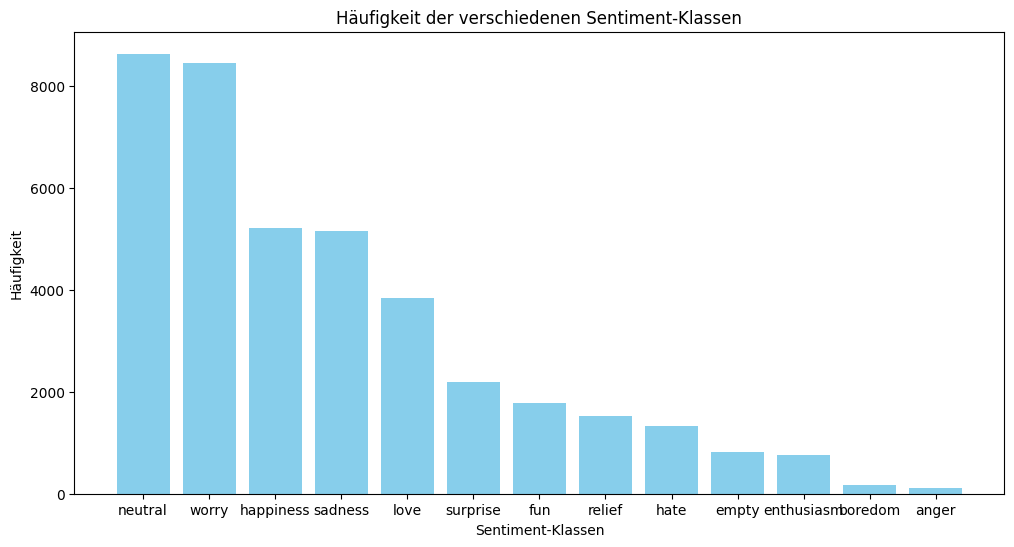

In [13]:
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue')
plt.xlabel('Sentiment-Klassen')
plt.ylabel('Häufigkeit')
plt.title('Häufigkeit der verschiedenen Sentiment-Klassen')


In [14]:
emotions = ["neutral", "worry", "happiness", "sadness", "love", "hate"]
df = df[df.sentiment.isin(emotions)]

In [15]:
df_test, df_train = train_test_split(df , test_size=0.33, random_state=42)

In [16]:
df_train['sentiment'].value_counts()

sentiment
worry        2841
neutral      2786
happiness    1720
sadness      1697
love         1286
hate          440
Name: count, dtype: int64

In [17]:
target_count = df_train['sentiment'].value_counts()['sadness']
balanced_df = pd.concat([
    df_train[df_train['sentiment'] == 'worry'].sample(target_count, random_state=42),
    df_train[df_train['sentiment'] == 'neutral'].sample(target_count, random_state=42),
    df_train[df_train['sentiment'] == 'happiness'].sample(target_count, random_state=42),
    df_train[df_train['sentiment'] == 'sadness'],
    df_train[df_train['sentiment'] == 'love'],
    df_train[df_train['sentiment'] == 'hate']
])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [18]:
balanced_df['sentiment'].value_counts()

sentiment
happiness    1697
sadness      1697
worry        1697
neutral      1697
love         1286
hate          440
Name: count, dtype: int64

Text(0.5, 1.0, 'Häufigkeit der verschiedenen Sentiment-Klassen')

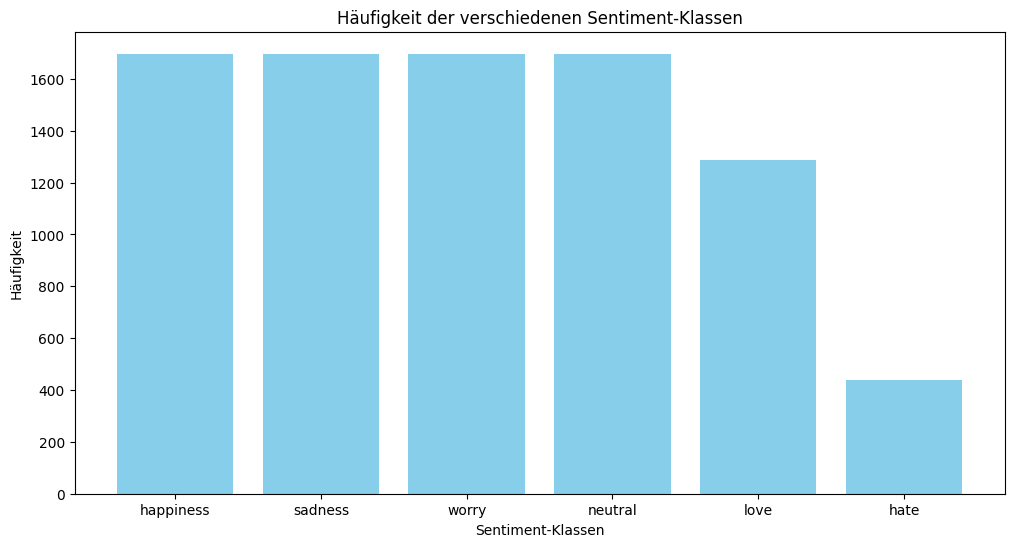

In [19]:
sentiment_counts = balanced_df['sentiment'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue')
plt.xlabel('Sentiment-Klassen')
plt.ylabel('Häufigkeit')
plt.title('Häufigkeit der verschiedenen Sentiment-Klassen')